In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

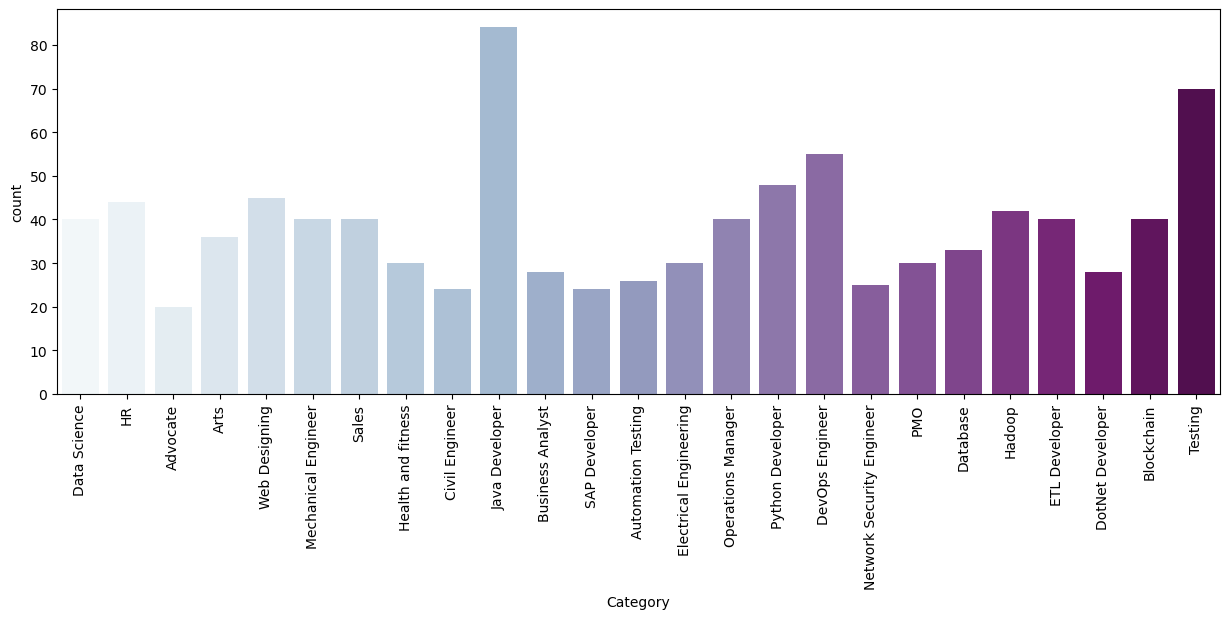

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Category'],palette='BuPu')
plt.xticks(rotation=90)
plt.show()

(array([], dtype=float64), [])

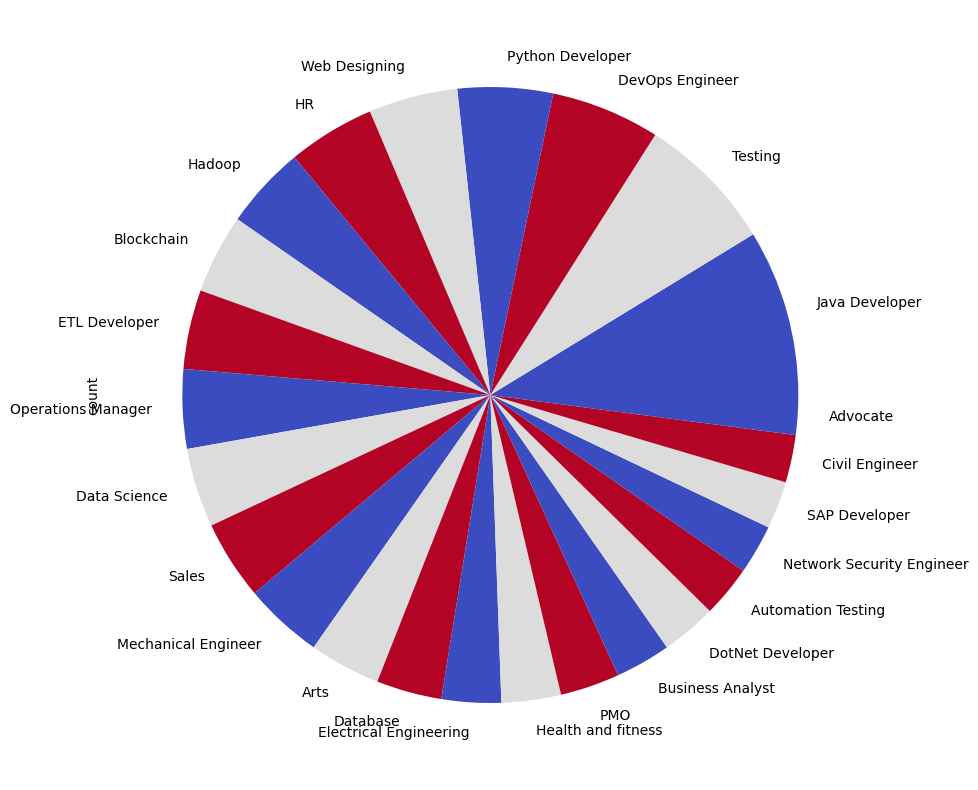

In [31]:
plt.figure(figsize=(15,10))
df['Category'].value_counts().plot(kind='pie',colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.xticks(rotation=30)

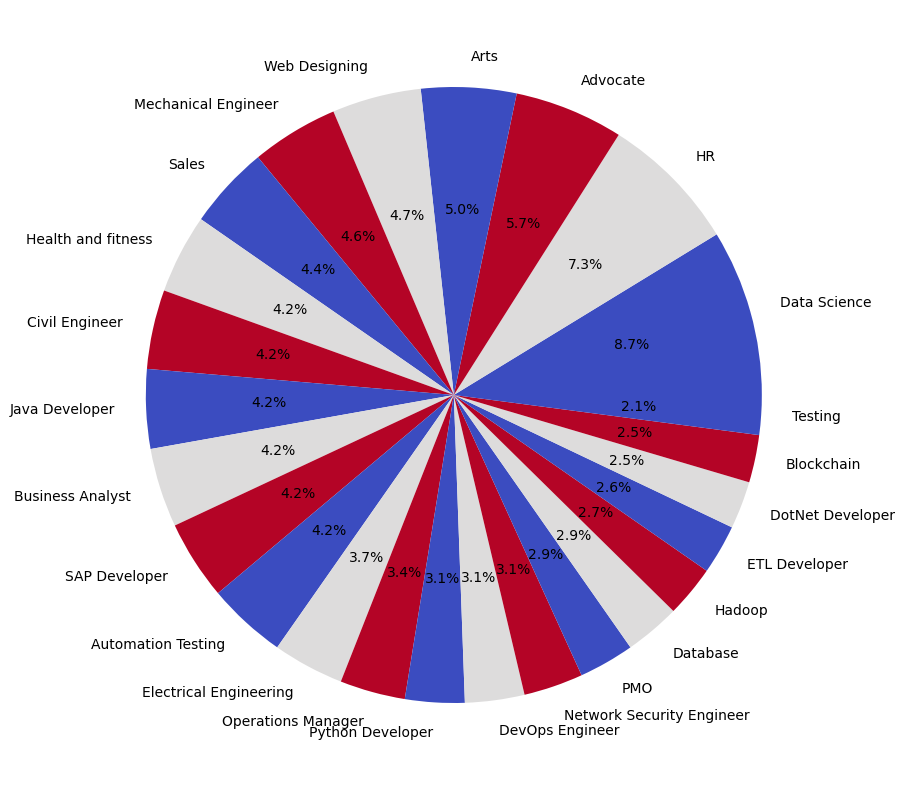

In [39]:
counts = df['Category'].value_counts()
label = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=label,autopct='%1.1f%%',colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [83]:

import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [84]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))

In [87]:
df['Resume'] = df['Resume'].str.lower()

In [89]:
df['Resume']

0      skills programming languages python pandas num...
1      education details may 2013 to may 2017 b e uit...
2      areas of interest deep learning control system...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient in ms office word b...
958     willingness to a ept the challenges positive ...
959    personal skills quick learner eagerness to lea...
960    computer skills software knowledge ms power po...
961    skill set os windows xp 7 8 8 1 10 database my...
Name: Resume, Length: 962, dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
lb = LabelEncoder()

In [93]:
lb.fit(df['Category'])
df['Category'] = lb.transform(df['Category'])

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdif = TfidfVectorizer(stop_words='english')

In [103]:
tdif.fit(df['Resume'])
rqeuired = tdif.fit_transform(df['Resume'])

In [104]:
df

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may 2013 to may 2017 b e uit...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...
...,...,...
957,23,computer skills proficient in ms office word b...
958,23,willingness to a ept the challenges positive ...
959,23,personal skills quick learner eagerness to lea...
960,23,computer skills software knowledge ms power po...


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X = rqeuired
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [113]:
pred = knn.predict(X_test)

In [115]:
from sklearn.metrics import classification_report,accuracy_score

In [119]:
print(accuracy_score(y_test,pred))

0.9874213836477987


In [120]:
import pickle
pickle.dump(tdif,open('tdif.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [118]:
resume = 'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the review process and run analytics and generate reports core member of a team helped in developing automated review platform tool from scratch for assisting e discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data worked on analyzing the outputs and precision monitoring for the entire tool tar assists in predictive coding topic modelling from the evidence by following ey standards developed the classifier models in order to identify red flags and fraud related issues tools technologies python scikit learn tfidf word2vec doc2vec cosine similarity na ve bayes lda nmf for topic modelling vader and text blob for sentiment analysis matplot lib tableau dashboard for reporting multiple data science and analytic projects usa clients text analytics motor vehicle customer review data received customer feedback survey data for past one year performed sentiment positive negative neutral and time series analysis on customer comments across all 4 categories created heat map of terms by survey category based on frequency of words extracted positive and negative words across all the survey categories and plotted word cloud created customized tableau dashboards for effective reporting and visualizations chatbot developed a user friendly chatbot for one of our products which handle simple questions about hours of operation reservation options and so on this chat bot serves entire product related questions giving overview of tool via qa platform and also give recommendation responses so that user question to build chain of relevant answer this too has intelligence to build the pipeline of questions as per user requirement and asks the relevant recommended questions tools technologies python natural language processing nltk spacy topic modelling sentiment analysis word embedding scikit learn javascript jquery sqlserver information governance organizations to make informed decisions about all of the information they store the integrated information governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk scan data from multiple sources of formats and parse different file formats extract meta data information push results for indexing elastic search and created customized interactive dashboards using kibana preforming rot analysis on the data which give information of data which helps identify content that is either redundant outdated or trivial preforming full text search analysis on elastic search with predefined methods which can tag as pii personally identifiable information social security numbers addresses names etc which frequently targeted during cyber attacks tools technologies python flask elastic search kibana fraud analytic platform fraud analytics and investigative platform to review all red flag cases fap is a fraud analytics and investigative platform with inbuilt case manager and suite of analytics for various erp systems it can be used by clients to interrogate their a ounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics tools technologies html javascript sqlserver jquery css bootstrap node js d3 js dc js'

In [122]:
import pickle

# Load the trained classifier
clf = pickle.load(open('knn.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tdif.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = knn.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
